In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv(r"C:/Users/insha/OneDrive/Desktop/Heart Patient analysis/heart_failure_clinical_records_dataset.csv")


data.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [3]:
back_up = data


back_up.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# lets split the dataset into two categories to make it easier for analysis

categorical_variables = data[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

continuous_variables = data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

In [8]:
categorical_variables.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
continuous_varaibles.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
data.groupby('DEATH_EVENT').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because the total death(96) is less than total persons who did not die due to heart failure(203)

In [5]:
age = data[['age']]
platelets = data[['platelets']]

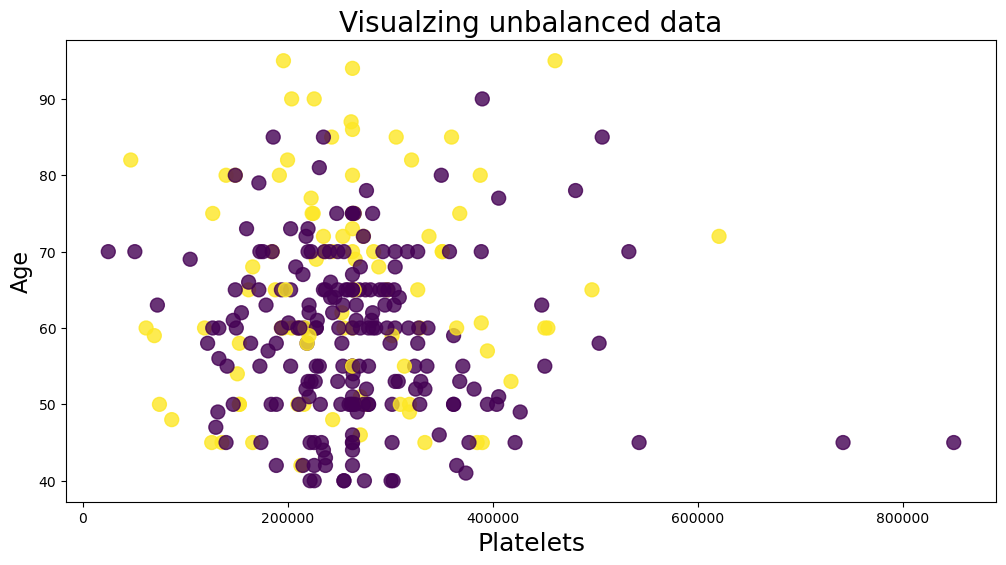

In [13]:
# Visualizing the unbalance data with a scatter plot

plt.figure(figsize = (12,6))
plt.scatter(platelets, age, c = data['DEATH_EVENT'], s= 100, alpha = 0.8)
plt.xlabel("Platelets", fontsize = 18)
plt.ylabel("Age", fontsize = 16)
plt.title("Visualzing unbalanced data", fontsize = 20)
plt.show()

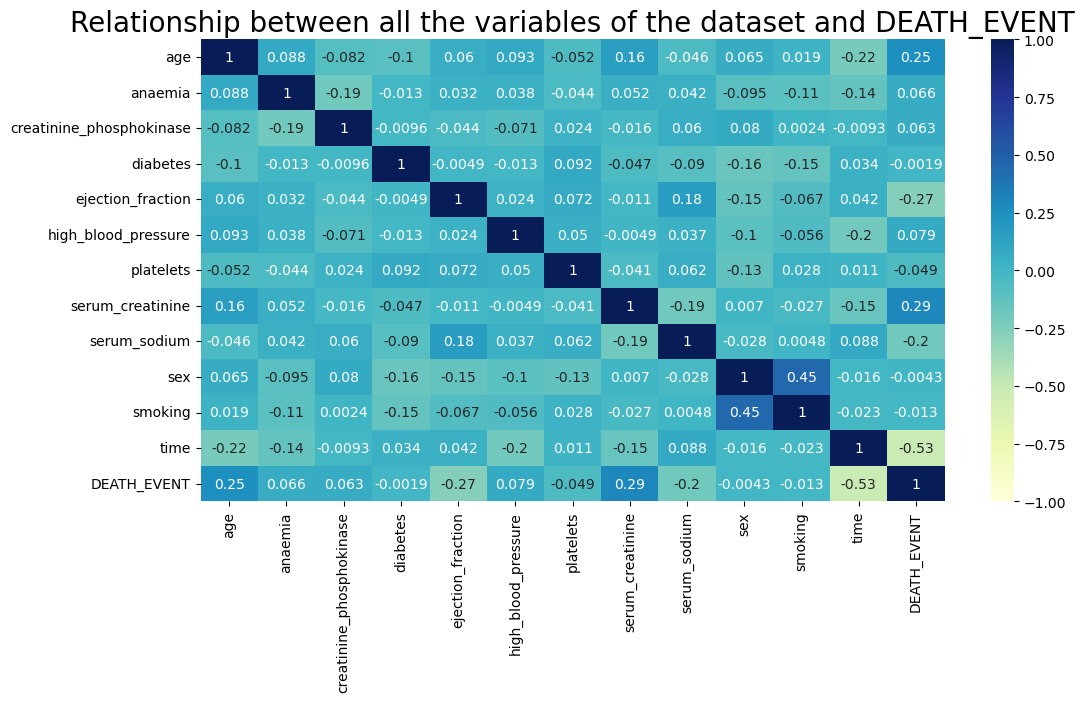

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = 'YlGnBu', annot = True)
plt.title('Relationship between all the variables of the dataset and DEATH_EVENT', fontsize =20)
plt.show()
plt.savefig('Images/Relationship-between-data.jpg')

There is a positive correlation between DEATH_EVENT and serum creatinine and age. We have also a negative correlation between DEATH_EVENT and time, ejection fraction and serum sodium a little bit.


##  Data Visualization

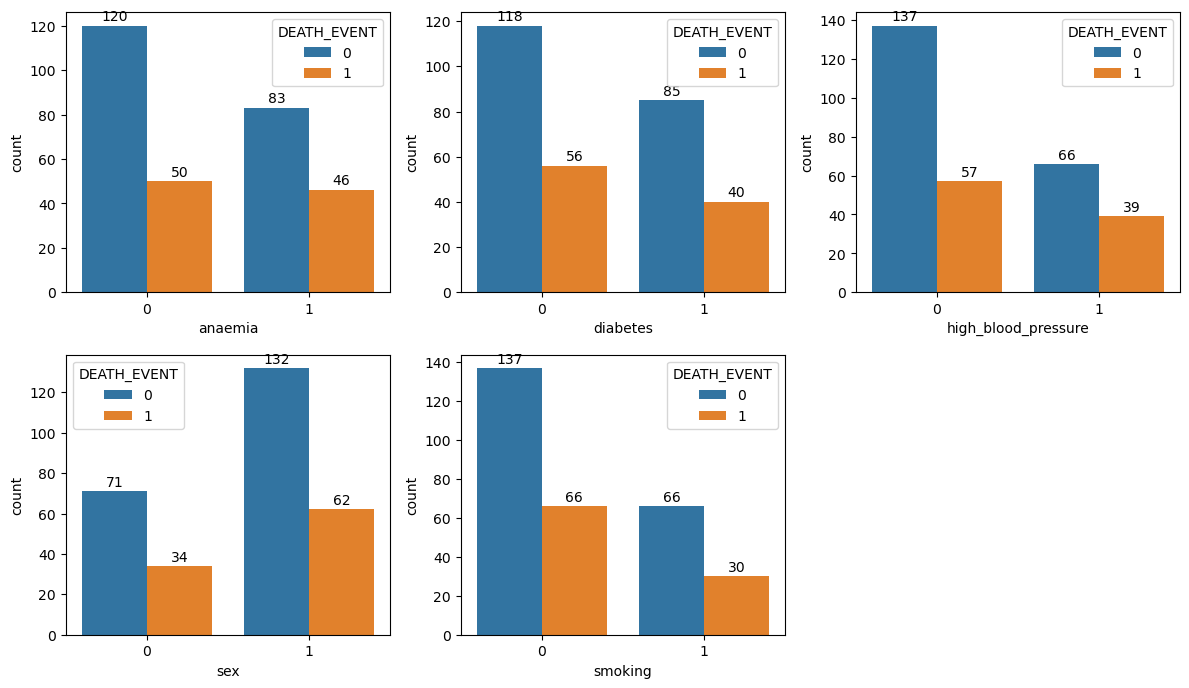

In [19]:
plt.figure(figsize=(12, 7))
for i, cat in enumerate(categorical_variables):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(data=data, x=cat, hue='DEATH_EVENT')
    
    # Add data labels
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2, 
            p.get_height() + 1,           
            int(p.get_height()),         
            ha='center',                   
            va='bottom',                 
            fontsize=10                    
        )

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


<Axes: xlabel='diabetes', ylabel='count'>

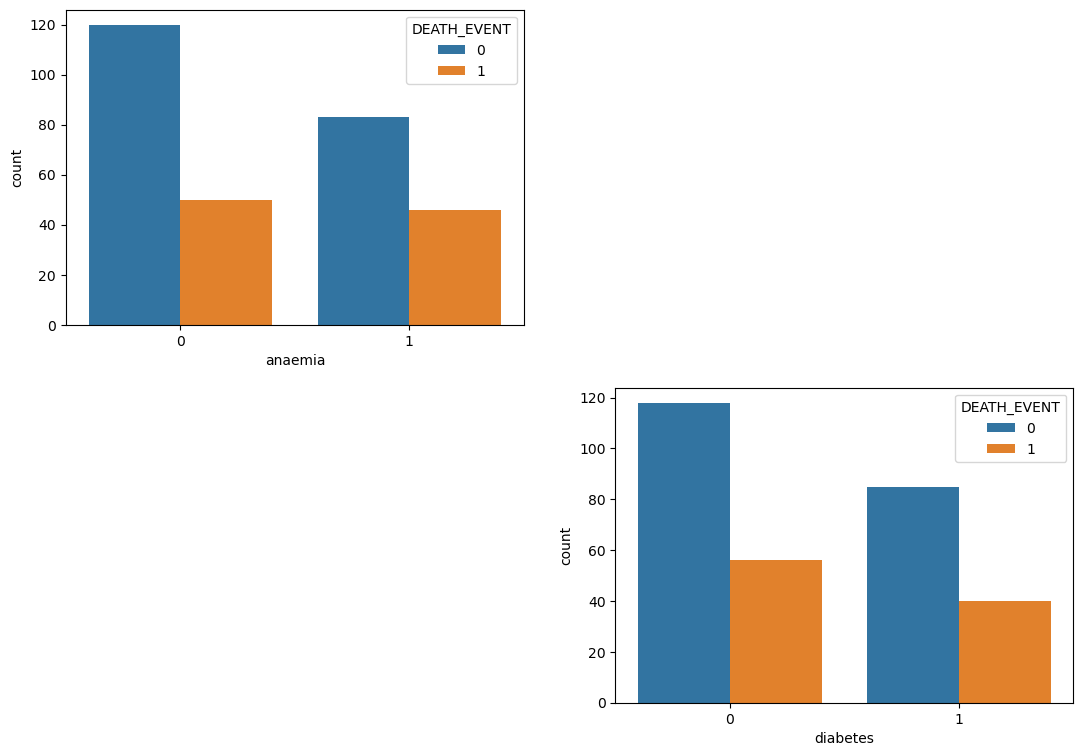

In [22]:
plt.figure(figsize =(13,9))
plt.subplot(2,2,1)
sns.countplot(data = data, x = 'anaemia', hue = 'DEATH_EVENT')

plt.subplot(2,2,4)
sns.countplot(data = data, x='diabetes', hue = 'DEATH_EVENT')

In [26]:
categorical_variables.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


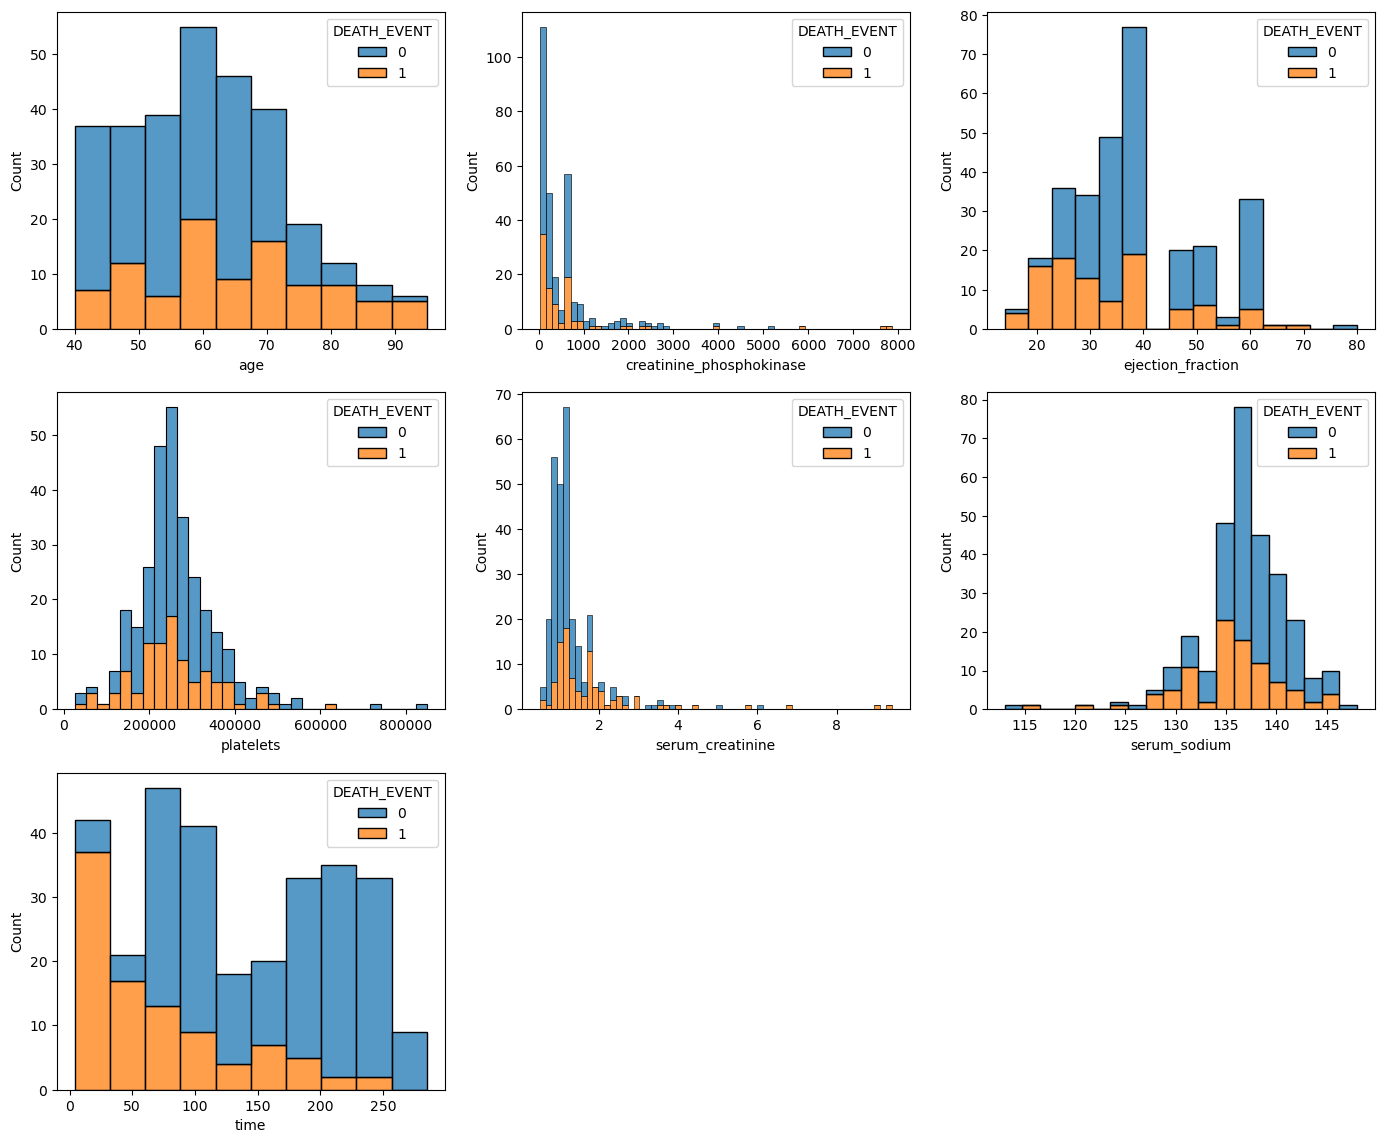

In [31]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize = (17,14))
for j, con in enumerate(continuous_variables):
    plt.subplot(3,3, j+1)
    sns.histplot(data = data, x = con, hue = 'DEATH_EVENT', multiple = 'stack')
    
plt.show()

In [32]:
continuous_variables.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


<Axes: xlabel='age', ylabel='Count'>

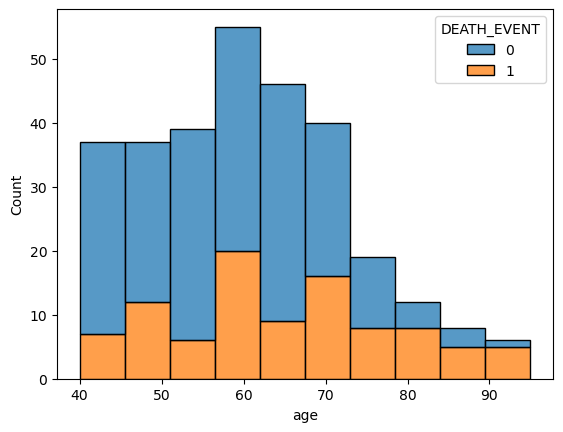

In [33]:
sns.histplot(data = data, x = 'age', hue = 'DEATH_EVENT', multiple = 'stack')

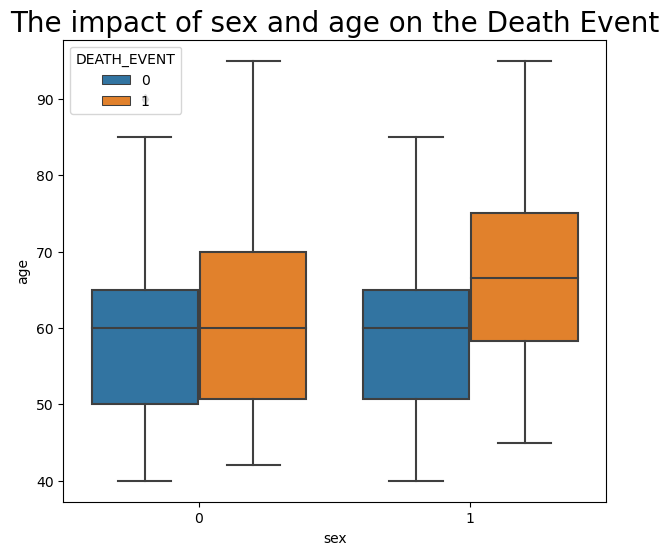

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize = (7,6))
sns.boxplot(data = data, x ='sex', y = 'age', hue ='DEATH_EVENT')
plt.title('The impact of sex and age on the Death Event', fontsize = 20 )
plt.show()
plt.savefig('Images/Impact-Age-Sex.png')

In [9]:
# Analyzing the survivalstatus on smoking

smokers = data[data['smoking']==1]
non_smokers = data[data['smoking']==0]

smokers.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1


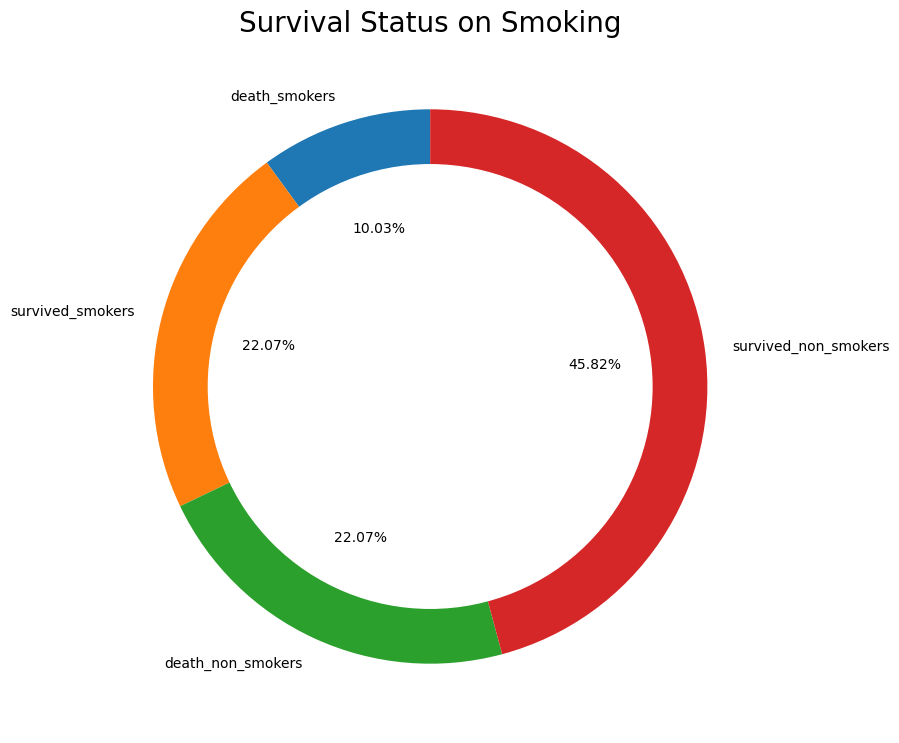

<Figure size 640x480 with 0 Axes>

In [10]:
death_smokers = smokers[smokers['DEATH_EVENT']==1]
survived_smokers = smokers[smokers['DEATH_EVENT']==0]

death_non_smokers = non_smokers[non_smokers['DEATH_EVENT']==1]
survived_non_smokers = non_smokers[non_smokers['DEATH_EVENT']==0]

smoking_data = [len(death_smokers),len(survived_smokers), len(death_non_smokers),len(survived_non_smokers)]
smoking_labels = ['death_smokers','survived_smokers','death_non_smokers','survived_non_smokers']

plt.figure(figsize = [10,9])
plt.pie(smoking_data, labels = smoking_labels, autopct = '%.2f%%', startangle = 90)
circle = plt.Circle((0,0),0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival Status on Smoking', fontsize = 20)
plt.show()
plt.savefig('Images/SurvivalStatus-Smoking')

([<matplotlib.patches.Wedge at 0x282f3729d50>,
 [Text(-0.34101771647194173, 1.045804435376071, 'death_smokers'),
  Text(-1.0666383040360583, 0.2688544743222278, 'survived_smokers'),
  Text(-0.4593445468845778, -0.9995011692076213, 'death_non_smokers'),
  Text(1.0905263753868297, 0.14405632435149665, 'survived_non_smokers')],
 [Text(-0.18600966353015, 0.5704387829324022, '10.03%'),
  Text(-0.5818027112923954, 0.14664789508485152, '22.07%'),
  Text(-0.2505515710279515, -0.5451824559314298, '22.07%'),
  Text(0.5948325683928161, 0.07857617691899817, '45.82%')])

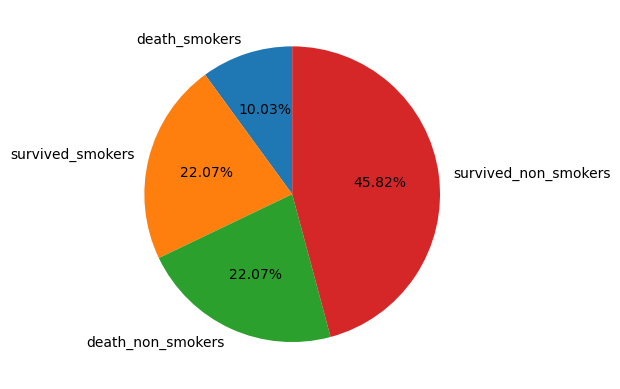

In [38]:
plt.pie(smoking_data, labels = smoking_labels, autopct = '%.2f%%', startangle = 90)

In [39]:
smokers[smokers['DEATH_EVENT']==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


In [42]:
len(smokers[smokers['DEATH_EVENT']==1])

30

In [43]:
smoking_data

[30, 66, 66, 137]

In [44]:
smoking_labels

['death_smokers',
 'survived_smokers',
 'death_non_smokers',
 'survived_non_smokers']

In [48]:
print((len(death_smokers)/299) * 100,
(len(survived_smokers)/299) * 100,
(len(death_non_smokers)/299) * 100,
(len(survived_non_smokers)/299) * 100)

10.033444816053512 22.073578595317723 22.073578595317723 45.819397993311036


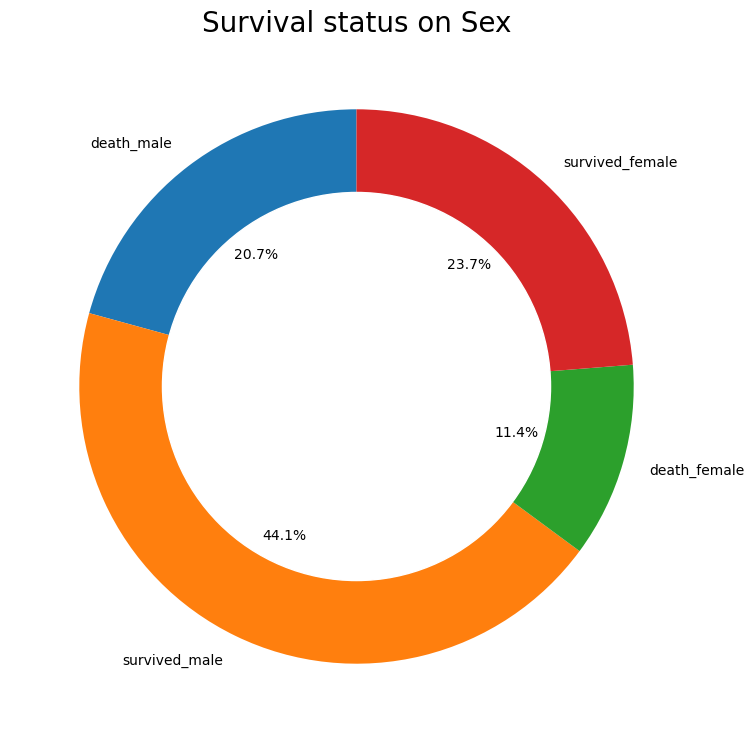

In [52]:
# Analyzing the survival status on sex

male = data[data['sex']==1]
female = data[data['sex']==0]

death_male = male[male['DEATH_EVENT']==1]
survived_male = male[male['DEATH_EVENT']==0]
death_female = female[female['DEATH_EVENT']==1]
survived_female = female[female['DEATH_EVENT']==0]

sex_data = [len(death_male),len(survived_male),len(death_female),len(survived_female)]
sex_label = ['death_male','survived_male','death_female','survived_female']

plt.figure(figsize = (10,9))
plt.pie(sex_data, labels = sex_label, autopct = '%.1f%%', startangle = 90)
circle = plt.Circle((0,0),0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on Sex', fontsize = 20)
plt.show()

In [53]:
sex_data

[62, 132, 34, 71]

In [54]:
sex_label

['death_male', 'survived_male', 'death_female', 'survived_female']

In [55]:
print((len(death_male)/299) * 100,
(len(survived_male)/299) * 100,
(len(death_female)/299) * 100,
(len(survived_female)/299) * 100)

20.735785953177256 44.14715719063545 11.37123745819398 23.745819397993312


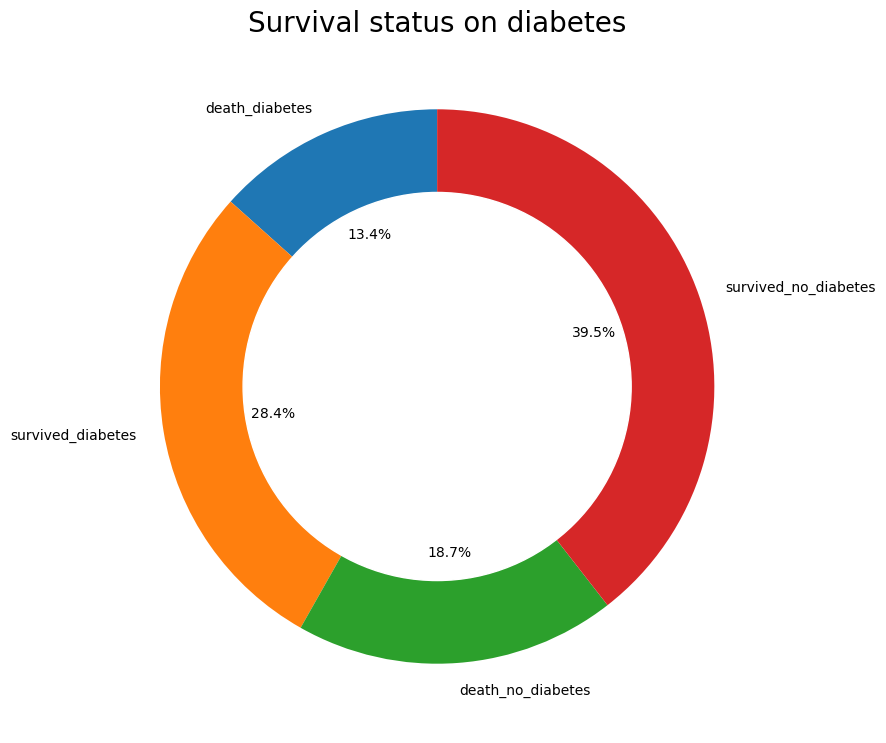

In [56]:
# Analyzing the staus on diabetes

diabetes = data[data['diabetes']==1]
no_diabetes = data[data['diabetes']==0]

death_diabetes = diabetes[diabetes['DEATH_EVENT']==1]
survived_diabetes = diabetes[diabetes['DEATH_EVENT']==0]
death_no_diabetes = no_diabetes[no_diabetes['DEATH_EVENT']==1]
survived_no_diabetes = no_diabetes[no_diabetes['DEATH_EVENT']==0]

diabetes_data = [len(death_diabetes),len(survived_diabetes),len(death_no_diabetes),len(survived_no_diabetes)]
diabetes_label = ['death_diabetes','survived_diabetes','death_no_diabetes','survived_no_diabetes']

plt.figure(figsize = (10,9))
plt.pie(diabetes_data, labels = diabetes_label, autopct = '%.1f%%', startangle = 90)
circle = plt.Circle((0,0),0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on diabetes', fontsize = 20)
plt.show()

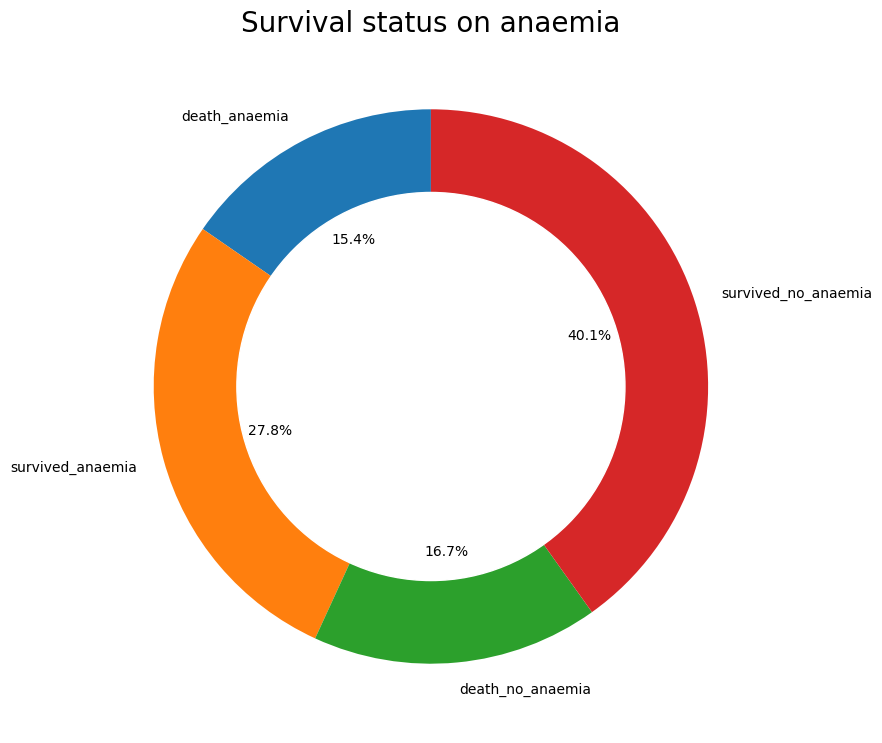

In [60]:
# Analyzing the staus on anaemia

anaemia = data[data['anaemia']==1]
no_anaemia = data[data['anaemia']==0]

death_anaemia = anaemia[anaemia['DEATH_EVENT']==1]
survived_anaemia = anaemia[anaemia['DEATH_EVENT']==0]
death_no_anaemia = no_anaemia[no_anaemia['DEATH_EVENT']==1]
survived_no_anaemia = no_anaemia[no_anaemia['DEATH_EVENT']==0]

anaemia_data = [len(death_anaemia),len(survived_anaemia),len(death_no_anaemia),len(survived_no_anaemia)]
anaemia_label = ['death_anaemia','survived_anaemia','death_no_anaemia','survived_no_anaemia']

plt.figure(figsize = (10,9))
plt.pie(anaemia_data, labels = anaemia_label, autopct = '%.1f%%', startangle = 90)
circle = plt.Circle((0,0),0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on anaemia', fontsize = 20)
plt.show()

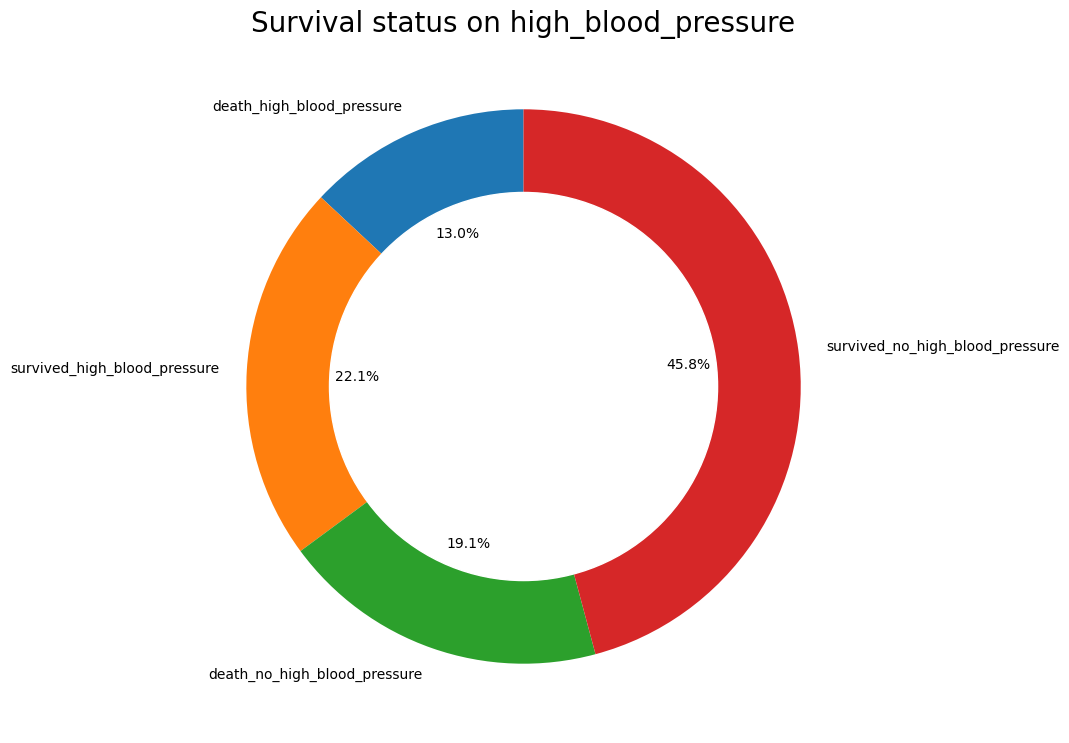

In [61]:
# Analyzing the staus on high blood pressure

high_blood_pressure = data[data['high_blood_pressure']==1]
no_high_blood_pressure = data[data['high_blood_pressure']==0]

death_high_blood_pressure = high_blood_pressure[high_blood_pressure['DEATH_EVENT']==1]
survived_high_blood_pressure = high_blood_pressure[high_blood_pressure['DEATH_EVENT']==0]
death_no_high_blood_pressure = no_high_blood_pressure[no_high_blood_pressure['DEATH_EVENT']==1]
survived_no_high_blood_pressure = no_high_blood_pressure[no_high_blood_pressure['DEATH_EVENT']==0]

high_blood_pressure_data = [len(death_high_blood_pressure),len(survived_high_blood_pressure),len(death_no_high_blood_pressure),len(survived_no_high_blood_pressure)]
high_blood_pressure_label = ['death_high_blood_pressure','survived_high_blood_pressure','death_no_high_blood_pressure','survived_no_high_blood_pressure']

plt.figure(figsize = (10,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_label, autopct = '%.1f%%', startangle = 90)
circle = plt.Circle((0,0),0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on high_blood_pressure', fontsize = 20)
plt.show()

## Data Modeling & Prediction using Continuous data

In [62]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [65]:
continuous_variables.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [66]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [67]:
# import train_test module

from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 2, test_size = 0.3)

print(x_train.shape,x_test.shape)

(209, 6) (90, 6)


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [107]:
accuracy_lists = []

#### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [108]:
lr_model = LogisticRegression()


lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)

lr_accuracy =  (round(accuracy_score(lr_prediction, y_test),3)*100)


print(lr_accuracy)

accuracy_lists.append(lr_accuracy)

87.8


#### Support Vector Machine

In [76]:
from sklearn.svm import SVC

In [109]:
svc_model = SVC()


svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy =  (round(accuracy_score(svc_prediction, y_test), 4) * 100)

print(svc_accuracy)

accuracy_lists.append(svc_accuracy)

84.44


#### Desicion Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy =  (round(accuracy_score(dt_prediction, y_test),3)*100)

print(dt_accuracy)

accuracy_lists.append(dt_accuracy)

88.9


#### Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

In [111]:
nb_model = GaussianNB()

nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy =  (round(accuracy_score(nb_prediction, y_test),4)*100)

print(nb_accuracy)

accuracy_lists.append(nb_accuracy)

82.22


#### Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage

print(rf_accuracy)

accuracy_lists.append(rf_accuracy)

86.67


#### KNearestNeighbor

In [86]:
from sklearn.neighbors import KNeighborsClassifier

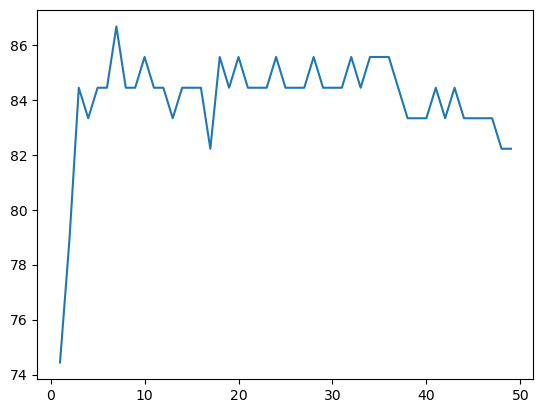

In [87]:
# We use this program to find the optimal value of k

knn_list = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
    
k = np.arange(1,50)
plt.plot(k, knn_list)

In [113]:
knn_model = KNeighborsClassifier(n_neighbors=6)

knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) #percentage

print(knn_accuracy)

accuracy_lists.append(knn_accuracy)

84.44


In [114]:
accuracy_lists

[87.8, 84.44, 88.9, 82.22, 86.67, 84.44]

In [106]:
models = ["Logistic Regression","SVC","Decision Tree","Naive Bayes","Random Forest","KNearestNeighbor"]

models

['Logistic Regression',
 'SVC',
 'Decision Tree',
 'Naive Bayes',
 'Random Forest',
 'KNearestNeighbor']

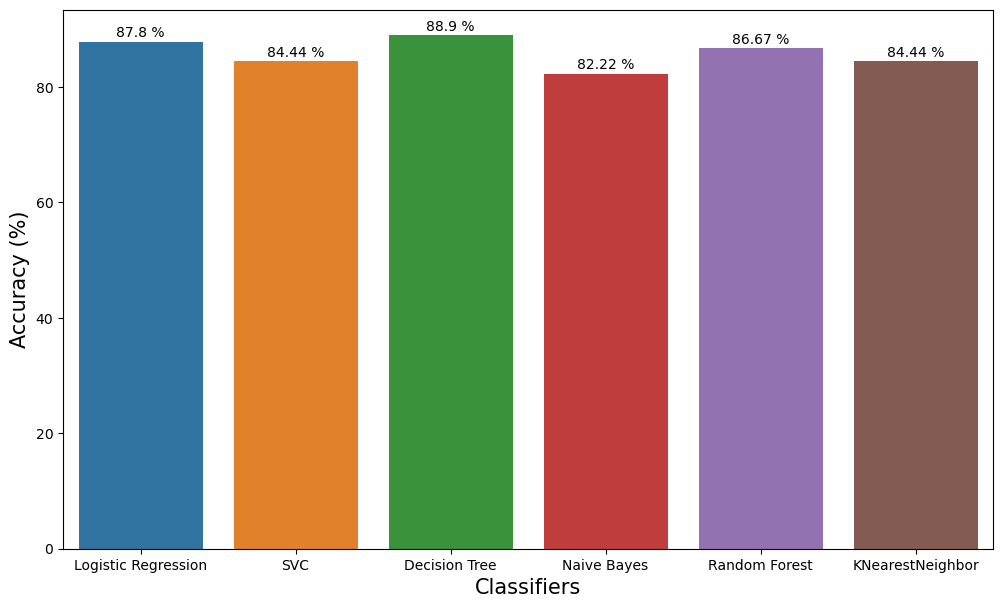

In [115]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_lists)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()